In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [2]:
from fedot_ind.api.utils.path_lib import PROJECT_PATH
path_to_datasets = PROJECT_PATH + '/benchmark/results/ts_regression'
path_to_results_2024 = PROJECT_PATH + '/benchmark/results/time_series_multi_reg_comparasion_09022024.csv'
reg_comp =pd.read_csv(path_to_results_2024, sep=';',decimal='.', index_col=0)
for i in os.listdir(path_to_datasets):
    try:
        print(i)
        metric_report = Path(path_to_datasets, i, 'metrics_report.csv')
        data = pd.read_csv(metric_report)
        try:
            new_metric = float(data[data['Dataset Name'] == i]['Fedot_Industrial_best'].values)
        except Exception:
            new_metric = float(data[data['Dataset Name'] == i]['Fedot_Industrial'].values)
        old_metric = float(reg_comp.loc[i, ['Fedot_Industrial_best']].values)
        if new_metric < old_metric or old_metric == 0:
            print(f"New result for dataset - {i}. Old metric - {old_metric}. New metric - {new_metric}")
            reg_comp.loc[i, ['Fedot_Industrial_best']] = new_metric
    except Exception:
        _ = 1
reg_comp = reg_comp.dropna(axis=0)

AppliancesEnergy
BeijingPM10Quality
BeijingPM25Quality
BenzeneConcentration
BIDMC32SpO2
BinanceCoinSentiment
New result for dataset - BinanceCoinSentiment. Old metric - 0.0. New metric - 0.3739252761096574
BitcoinSentiment
New result for dataset - BitcoinSentiment. Old metric - 0.0. New metric - 0.22025288337729423
CardanoSentiment
New result for dataset - CardanoSentiment. Old metric - 0.0. New metric - 0.3248170656362524
ChilledWaterPredictor
New result for dataset - ChilledWaterPredictor. Old metric - 0.0. New metric - 1022.1147158659435
Covid3Month
DhakaHourlyAirQuality
New result for dataset - DhakaHourlyAirQuality. Old metric - 0.0. New metric - 1.0511896957002544
ElectricityPredictor
New result for dataset - ElectricityPredictor. Old metric - 0.0. New metric - 439.36594137858134
EthereumSentiment
New result for dataset - EthereumSentiment. Old metric - 0.0. New metric - 0.2260230262561022
FloodModeling1
New result for dataset - FloodModeling1. Old metric - 0.00612. New metric - 

## Most unrobust models

In [3]:
model_df = reg_comp
not_stable_models = list(model_df.mean().sort_values(ascending=False)[:5].index)
not_stable_models

['RDST_RMSE', 'FPCR-Bs_RMSE', 'FPCR_RMSE', 'Ridge_RMSE', '1NN-ED_RMSE']

In [4]:
def categorize_dataset(metric):
    if metric < 10:
        return 'Easy to solve dataset'
    elif 10 < metric < 20:
        return 'Normal to solve dataset'
    elif 20 < metric < 30:
        return 'Hard to solve dataset'
    else:
        return 'Extraordinary Hard to solve dataset'

In [5]:
stable_models = [ x for x in reg_comp.columns if x not in not_stable_models]
reg_comp['Difference %'] = ((reg_comp.iloc[:, :-2].min(axis=1) - reg_comp['Fedot_Industrial_best']) / min(reg_comp.iloc[:, :-2].min(axis=1).values[0],reg_comp.iloc[:, :-2].mean(axis=1).values[0])) * 100
reg_comp['Metric dispersion by dataset'] = (reg_comp.iloc[:, :-1].std(axis=1)/reg_comp.iloc[:, :-1].max(axis=1))*100
reg_comp['dataset_category'] = reg_comp['Metric dispersion by dataset'].apply(categorize_dataset)
reg_comp = reg_comp[reg_comp['Fedot_Industrial_best']!=0]

In [6]:
reg_comp

,1NN-DTW_RMSE,1NN-ED_RMSE,5NN-DTW_RMSE,5NN-ED_RMSE,CNN_RMSE,DrCIF_RMSE,FCN_RMSE,FPCR-Bs_RMSE,FPCR_RMSE,FreshPRINCE_RMSE,...,ResNet_RMSE,Ridge_RMSE,RotF_RMSE,SingleInception_RMSE,TSF_RMSE,XGBoost_RMSE,Fedot_Industrial_best,Difference %,Metric dispersion by dataset,dataset_category
HouseholdPowerConsumption1,417.520861,534.266678,363.106601,507.796826,604.549659,165.766677,353.211342,110.606270,107.061828,104.040422,...,108.828881,203.543701,199.234599,116.202251,276.188294,227.507324,99.972746,3.909708,27.619601,Hard to solve dataset
AppliancesEnergy,5.739470,5.768104,4.504958,4.470334,4.097874,2.404670,4.452677,4.500813,4.419099,2.053976,...,3.957921,4.695629,2.557591,4.399413,3.752866,4.045985,1.924000,0.124929,18.433573,Normal to solve dataset
HouseholdPowerConsumption2,53.429559,76.024116,43.287550,57.685928,51.529379,30.635327,172.601053,41.344814,40.829072,29.392874,...,33.304921,57.710924,37.590936,34.585894,36.015731,38.955683,34.370000,-5.896093,17.004424,Normal to solve dataset
IEEEPPG,23.987240,27.769715,20.452884,23.655007,22.426885,12.474585,7.190419,26.398372,26.395514,10.115907,...,5.051279,47.502751,20.212812,4.119866,20.472003,21.033698,29.742793,-25.033171,22.217686,Hard to solve dataset
FloodModeling1,0.013817,0.018511,0.013124,0.019009,0.017236,0.009463,0.009510,0.020827,0.021319,0.008751,...,0.009046,0.020951,0.017988,0.010004,0.011029,0.019334,0.004626,0.001733,18.458389,Normal to solve dataset
BeijingPM25Quality,71.066726,73.245699,59.503839,60.872956,99.887573,47.127547,45.523481,61.336023,62.028248,43.418729,...,44.166483,60.914785,42.839214,42.008177,61.674262,42.147228,60.750000,-19.597525,15.859396,Normal to solve dataset
BenzeneConcentration,4.402315,4.858189,5.053820,4.240799,7.543093,3.666043,0.596533,4.884306,5.241220,2.132254,...,0.302587,1.132592,0.728738,0.276406,4.189510,0.218806,1.637000,-1.353166,30.551632,Extraordinary Hard to solve dataset
FloodModeling3,0.013074,0.017028,0.011562,0.017738,0.010964,0.006439,0.009331,0.018776,0.019448,0.005583,...,0.007282,0.019032,0.015684,0.010451,0.008546,0.017007,0.006690,-0.001495,19.130581,Normal to solve dataset
BeijingPM10Quality,118.230571,119.246110,95.318785,97.130645,127.598974,70.572713,70.596483,92.628381,93.047781,66.509446,...,68.418040,92.350207,66.315628,66.519288,84.657174,66.474818,96.752000,-31.625915,15.598830,Normal to solve dataset
FloodModeling2,0.011092,0.012949,0.012064,0.013299,0.018521,0.005180,0.004745,0.014591,0.013853,0.005028,...,0.007550,0.014162,0.007900,0.007653,0.005379,0.012971,0.008607,-0.004380,18.688104,Normal to solve dataset


# Compute ranks

In [7]:
clear_csv = reg_comp.iloc[:, :-3]
pd.DataFrame(clear_csv.rank(axis=1).mean(axis=0).sort_values(), columns=['mean rank'])

,mean rank
RIST_RMSE,5.614286
FreshPRINCE_RMSE,5.957143
DrCIF_RMSE,6.728571
Fedot_Industrial_best,8.857143
InceptionT_RMSE,8.900000
RDST_RMSE,9.157143
RotF_RMSE,9.328571
TSF_RMSE,9.871429
MultiROCKET_RMSE,10.500000
RandF_RMSE,10.914286


Fedot.ind has mean rank 8.85. It's the 4'th place comparing with SOTA

In [8]:
groupby_df = reg_comp.groupby(by = 'dataset_category').mean()
groupby_df = groupby_df.iloc[:,:-2]
groupby_df['Difference in each category %'] = groupby_df.iloc[:, :-1].min(axis=1) - groupby_df['Fedot_Industrial_best']
groupby_df['Difference in each category %']

dataset_category
Easy to solve dataset                  -0.020968
Extraordinary Hard to solve dataset    -5.829999
Hard to solve dataset                  -2.450783
Normal to solve dataset                54.236460
Name: Difference in each category %, dtype: float64

# Top-k stats

In [9]:
top_1 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nsmallest(1)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-1']).fillna(0)
top_3 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nsmallest(3)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-3'])
top_5 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nsmallest(5)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-5'])
top_half = pd.DataFrame(clear_csv.T.apply(lambda x: x.nsmallest(7)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-half'])
pd.concat([top_1, top_3, top_5, top_half], axis=1).fillna(0)

,top-1,top-3,top-5,top-half
Fedot_Industrial_best,9.0,13.0,14,15
RDST_RMSE,8.0,12.0,13,14
DrCIF_RMSE,4.0,8.0,17,20
MultiROCKET_RMSE,4.0,4.0,8,14
InceptionT_RMSE,3.0,10.0,16,19
RIST_RMSE,2.0,15.0,19,25
CNN_RMSE,1.0,1.0,1,2
FCN_RMSE,1.0,2.0,4,7
FreshPRINCE_RMSE,1.0,12.0,19,25
Ridge_RMSE,1.0,1.0,2,2


# Rank Distribution

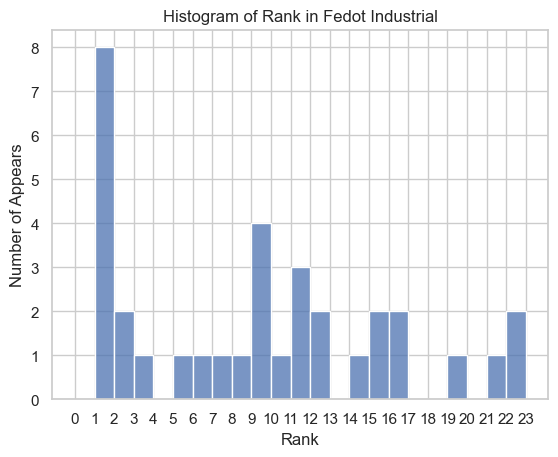

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming clear_csv is a pandas DataFrame and 'Fedot_Industrial' is a column in it
quantiles = clear_csv.rank(axis=1) 
bins = np.arange(clear_csv.shape[1])
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram with seaborn
sns.histplot(quantiles.loc[:, 'Fedot_Industrial_best'], bins=bins)

# Add labels and title
plt.xlabel('Rank')
plt.ylabel('Number of Appears')
plt.xticks(bins)
plt.title('Histogram of Rank in Fedot Industrial')

# Show the plot
plt.show()

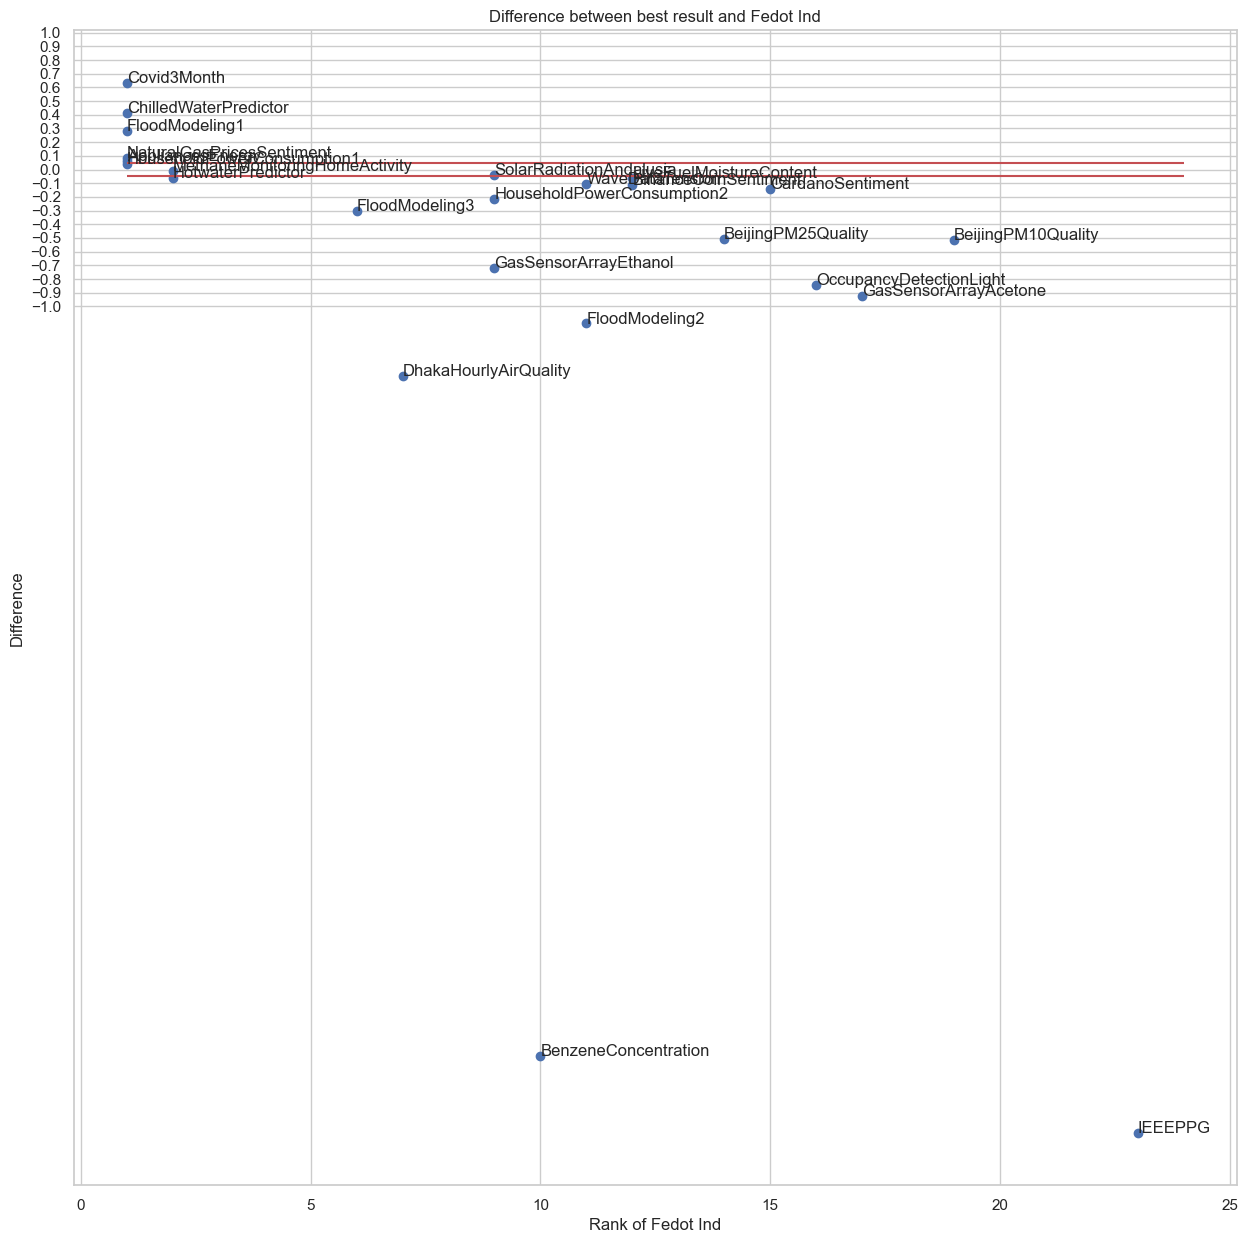

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
# Assuming clear_csv is a pandas DataFrame and 'Fedot_Industrial' is a column in it
quantiles = clear_csv.rank(axis=1, ascending=True) 
differences_from_first_place = (clear_csv.iloc[:, :-1].min(axis=1) - clear_csv['Fedot_Industrial_best']) / clear_csv.iloc[:, :-1].min(axis=1)
# Set the style of the plot
sns.set(style="whitegrid")
plt.yticks(np.arange(-1, 4, 0.1))

# Create a histogram with seaborn
plt.scatter(quantiles.loc[:, 'Fedot_Industrial_best'], differences_from_first_place)
for i in range(len(quantiles.loc[:, 'Fedot_Industrial_best'])):
    plt.annotate(reg_comp.index.values[i], (quantiles.loc[:, 'Fedot_Industrial_best'].values[i], differences_from_first_place.values[i]))

plt.hlines(y = 0.05, xmin = 1, xmax = clear_csv.shape[1], color='r') 
plt.hlines(y = -0.05, xmin = 1, xmax = clear_csv.shape[1], color='r') 
# Add labels and title
plt.xlabel('Rank of Fedot Ind')
plt.ylabel('Difference')
plt.title('Difference between best result and Fedot Ind')

# Show the plot
plt.show()

# Poor solutions

In [12]:
poor_idx = reg_comp.sort_values(by='Difference %', ascending=True).iloc[:10, :].index.values
poor_idx

array(['BIDMC32HR', 'VentilatorPressure', 'BIDMC32RR', 'BIDMC32SpO2',
       'NewsTitleSentiment', 'AustraliaRainfall', 'NewsHeadlineSentiment',
       'IEEEPPG', 'BenzeneConcentration', 'DhakaHourlyAirQuality'],
      dtype=object)

For BIDMC32HR no results!


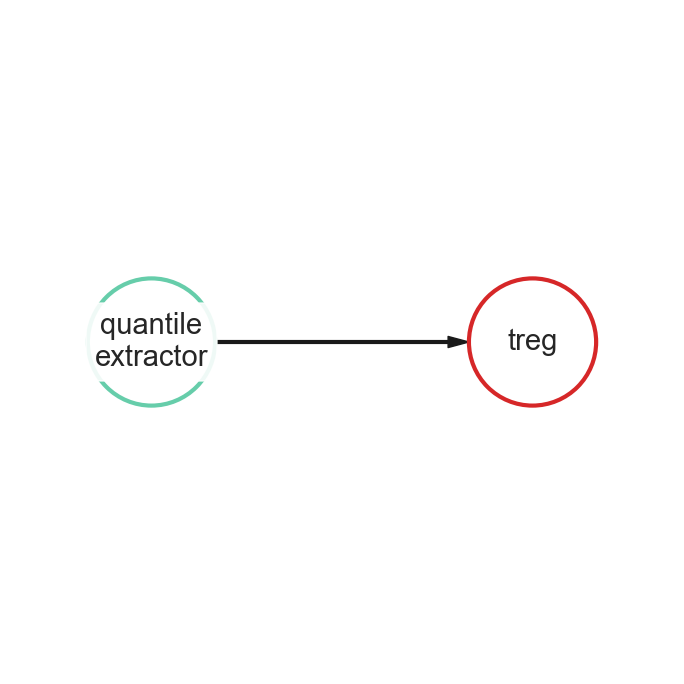

For BIDMC32RR no results!
For AustraliaRainfall no results!
For NewsHeadlineSentiment no results!


In [124]:
import os
from pathlib import Path
from fedot.core.pipelines.pipeline import Pipeline
prefix = 'pipeline_saved'
for idx in poor_idx:
    try:
        best_model = Path(path_to_datasets, idx)
        saved_pipeline = [x for x in os.listdir(best_model) if x.__contains__(prefix)][0]
        best_model = Path(path_to_datasets, idx,  saved_pipeline, f'{saved_pipeline}.json')
        pipeline = Pipeline().load(best_model)
        pipeline.show()
    except:
        print(f'For {idx} no results!')

There are no fittnes_by_generation file that may mean not enough time for composing

# Good solutions

BIDMC32SpO2


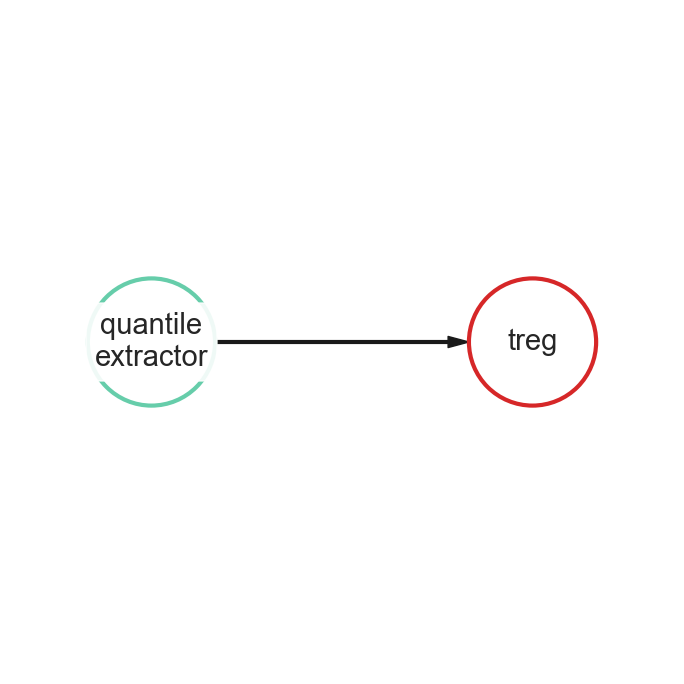

BIDMC32RR
[WinError 3] Системе не удается найти указанный путь: 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\benchmark\\results\\ts_regression\\BIDMC32RR'
For BIDMC32RR no results!
AustraliaRainfall
list index out of range
For AustraliaRainfall no results!
NewsHeadlineSentiment
Can't get attribute 'IndustrialMutations' on <module 'fedot_ind.core.repository.initializer_industrial_models' from 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\fedot_ind\\core\\repository\\initializer_industrial_models.py'>
For NewsHeadlineSentiment no results!
NewsTitleSentiment
Can't get attribute 'IndustrialMutations' on <module 'fedot_ind.core.repository.initializer_industrial_models' from 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\fedot_ind\\core\\repository\\initializer_industrial_models.py'>
For NewsTitleSentiment no results!
IEEEPPG
[Errno 2] No such file or directory: 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\benchmark\\results\\ts_regression\\IEEEPPG\\0_pipeline_saved\\0_pipeline_saved.json'
For IEEEPPG 

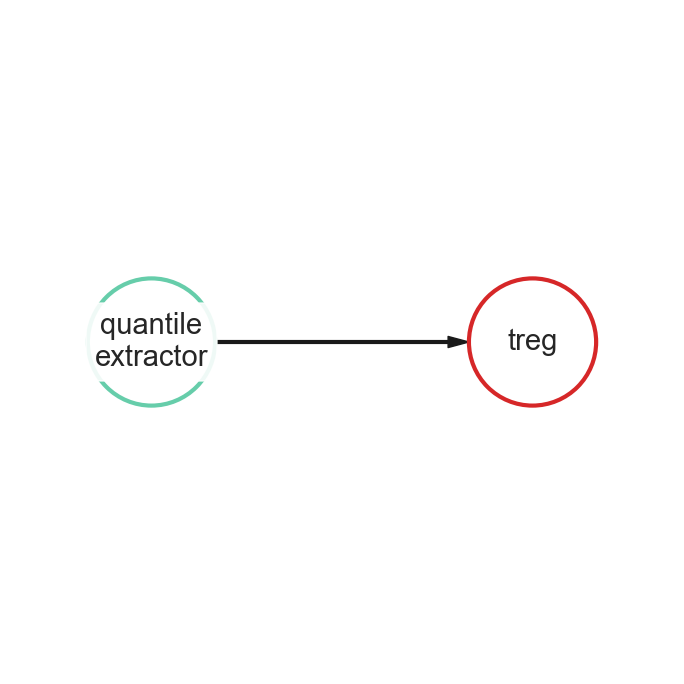

FloodModeling2


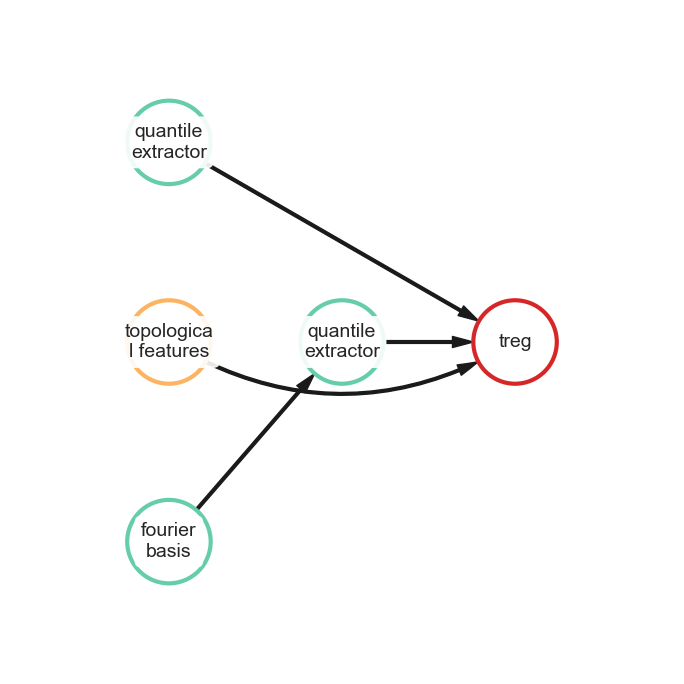

FloodModeling3


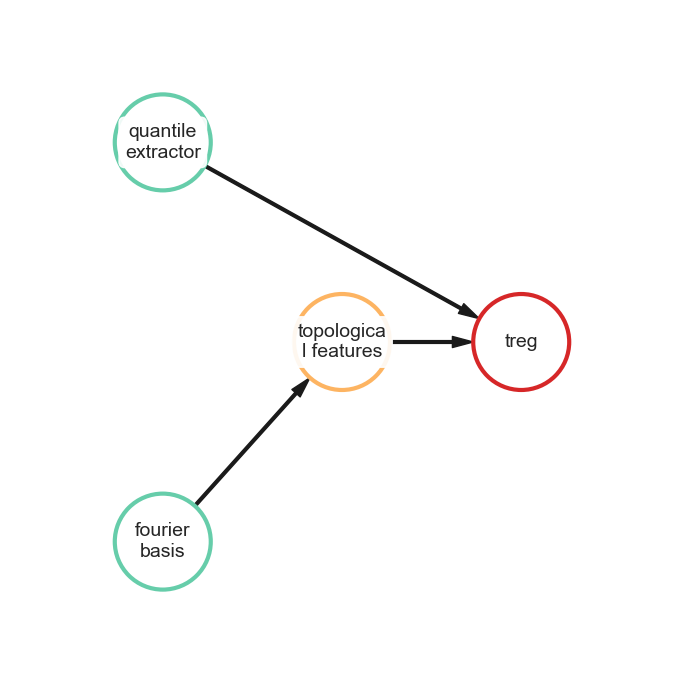

BeijingPM10Quality
No module named 'fedot_ind.core.operation.interfaces.industrial_decomposition_for_forecasting_strategy'
For BeijingPM10Quality no results!
BeijingPM25Quality
No module named 'fedot_ind.core.operation.interfaces.industrial_decomposition_for_forecasting_strategy'
For BeijingPM25Quality no results!
HouseholdPowerConsumption2
Can't get attribute 'IndustrialMutations' on <module 'fedot_ind.core.repository.initializer_industrial_models' from 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\fedot_ind\\core\\repository\\initializer_industrial_models.py'>
For HouseholdPowerConsumption2 no results!
LiveFuelMoistureContent
No module named 'fedot_ind.core.operation.interfaces.industrial_decomposition_for_forecasting_strategy'
For LiveFuelMoistureContent no results!
HouseholdPowerConsumption1
Can't get attribute 'IndustrialMutations' on <module 'fedot_ind.core.repository.initializer_industrial_models' from 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\fedot_ind\\core\\repository\\initiali

In [125]:
good_idx = reg_comp.sort_values(by='Difference %', ascending=True).iloc[:15, :].index.values
from pathlib import Path
from fedot.core.pipelines.pipeline import Pipeline
for idx in good_idx[1::]:
    try:
        print(idx)
        best_model = Path(path_to_datasets, idx)
        saved_pipeline = [x for x in os.listdir(best_model) if x.__contains__(prefix)][0]
        best_model = Path(path_to_datasets, idx,  saved_pipeline, f'{saved_pipeline}.json')
        pipeline = Pipeline().load(best_model)
        for i in pipeline.nodes:
            if i.name == 'fedot_regr':
                subpipeline = i.fitted_operation.model.current_pipeline
                print(subpipeline)
        pipeline.show()
    except Exception as e:
        print(e)
        print(f'For {idx} no results!')